In [1]:
import tensorflow as tf

devices = tf.config.experimental.list_physical_devices()
print(devices)
tf.config.experimental.set_memory_growth(devices[1],True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from keras.applications.mobilenet import MobileNet

mobile = MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [3]:
import cv2,keras,numpy as np
from keras.preprocessing import image
def prepareImage(imageName):
    img = image.load_img(imageName,target_size=(224,224))
    image_array = image.img_to_array(img)
    
    #img = cv2.resize(cv2.imread(imageName),(224,224))
    
    imag_array_expanded_dims = np.expand_dims(img, axis=0)
    return keras.applications.mobilenet.preprocess_input(imag_array_expanded_dims)

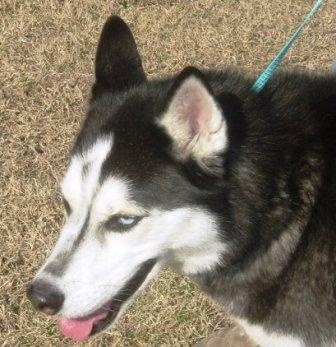

In [4]:
from IPython.display import Image
Image("dog.jpg")

In [5]:
from keras.applications.mobilenet import decode_predictions

image = prepareImage("dog.jpg")

decode_predictions(mobile.predict(image))


[[('n02110185', 'Siberian_husky', 0.7216982),
  ('n02109961', 'Eskimo_dog', 0.2545547),
  ('n02110063', 'malamute', 0.02358951),
  ('n02091467', 'Norwegian_elkhound', 7.54358e-05),
  ('n02113023', 'Pembroke', 2.9711338e-05)]]

In [6]:
import os,shutil
import random

os.chdir("Dataset")

if os.path.isdir("train/0/") is False:
    os.mkdir("train")
    os.mkdir("valid")
    os.mkdir("test")

    for i in range(0,10):
        shutil.move(f"{i}","train")

        os.mkdir(f"valid/{i}")
        os.mkdir(f"test/{i}")

        valid_samples = random.sample(os.listdir(f"train/{i}"),30)
        for k in valid_samples:
            shutil.move(f"train/{i}/{k}",f"valid/{i}")

        test_samples = random.sample(os.listdir(f"train/{i}"),5)
        for k in test_samples:
            shutil.move(f"train/{i}/{k}",f"test/{i}")
os.chdir("../..")

In [7]:
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_path = "MobileNet\Dataset\\train"
test_path = "MobileNet\Dataset\\test"
valid_path = "MobileNet\Dataset\\valid"

train_batches = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(target_size=(224,224),batch_size=10,directory=train_path)
test_batches = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(target_size=(224,224),batch_size=10,directory=test_path,shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(target_size=(224,224),batch_size=10,directory=valid_path)

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [8]:
next(train_batches)

(array([[[[-0.14509803, -0.14509803, -0.12941176],
          [-0.14509803, -0.14509803, -0.12941176],
          [-0.11372548, -0.11372548, -0.09803921],
          ...,
          [-0.16862744, -0.17647058, -0.1372549 ],
          [-0.17647058, -0.18431371, -0.14509803],
          [-0.17647058, -0.18431371, -0.14509803]],
 
         [[-0.14509803, -0.14509803, -0.12941176],
          [-0.14509803, -0.14509803, -0.12941176],
          [-0.11372548, -0.11372548, -0.09803921],
          ...,
          [-0.16862744, -0.17647058, -0.1372549 ],
          [-0.17647058, -0.18431371, -0.14509803],
          [-0.17647058, -0.18431371, -0.14509803]],
 
         [[-0.12941176, -0.12941176, -0.11372548],
          [-0.12941176, -0.12941176, -0.11372548],
          [-0.09019607, -0.09019607, -0.0745098 ],
          ...,
          [-0.15294117, -0.1607843 , -0.12156862],
          [-0.1607843 , -0.16862744, -0.12941176],
          [-0.1607843 , -0.16862744, -0.12941176]],
 
         ...,
 
         [[-

In [9]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam

model = Sequential()

for layer in mobile.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Dense(units=10,activation="softmax"))
model.compile(Adam(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
model.fit(train_batches,validation_data=valid_batches,epochs=30,verbose=2)

Epoch 1/30
172/172 - 7s - loss: 0.4661 - accuracy: 0.1501 - val_loss: 0.3149 - val_accuracy: 0.2900 - 7s/epoch - 42ms/step
Epoch 2/30
172/172 - 5s - loss: 0.2698 - accuracy: 0.3873 - val_loss: 0.2343 - val_accuracy: 0.5033 - 5s/epoch - 28ms/step
Epoch 3/30
172/172 - 5s - loss: 0.2099 - accuracy: 0.5736 - val_loss: 0.1935 - val_accuracy: 0.6200 - 5s/epoch - 28ms/step
Epoch 4/30
172/172 - 5s - loss: 0.1758 - accuracy: 0.6776 - val_loss: 0.1693 - val_accuracy: 0.7033 - 5s/epoch - 30ms/step
Epoch 5/30
172/172 - 5s - loss: 0.1528 - accuracy: 0.7453 - val_loss: 0.1518 - val_accuracy: 0.7367 - 5s/epoch - 31ms/step
Epoch 6/30
172/172 - 6s - loss: 0.1365 - accuracy: 0.7886 - val_loss: 0.1371 - val_accuracy: 0.7800 - 6s/epoch - 35ms/step
Epoch 7/30
172/172 - 5s - loss: 0.1245 - accuracy: 0.8189 - val_loss: 0.1272 - val_accuracy: 0.8100 - 5s/epoch - 27ms/step
Epoch 8/30
172/172 - 5s - loss: 0.1148 - accuracy: 0.8417 - val_loss: 0.1186 - val_accuracy: 0.8267 - 5s/epoch - 27ms/step
Epoch 9/30
172/1

In [11]:
test_labels = test_batches.classes

In [12]:
output = model.predict(test_batches,verbose=0)
predict_labels_mobile = np.argmax(output,axis=1)

In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [14]:
cm = confusion_matrix(test_labels,predict_labels_mobile)

In [15]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

    print(cm)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 1 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 1 0 0 4]]


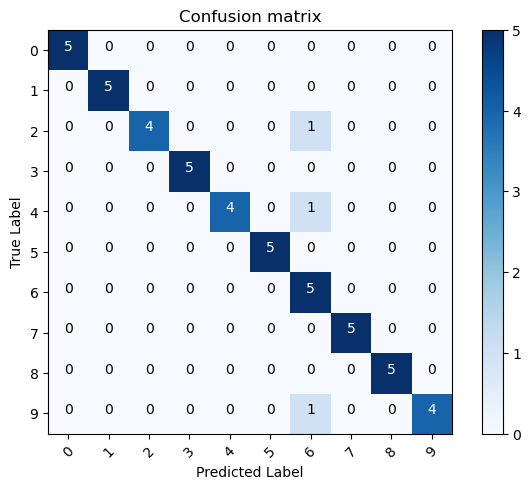

In [16]:
cm_plot_labels = range(0,10)
plot_confusion_matrix(cm,cm_plot_labels)